Problem Statement 1: The data (sample) were collected in São Paulo — Brazil, in a university, where there are some parties with groups of students from 18 to 28 years of age(average). The dataset used for this activity has 7 attributes, being a Target, with a period of one year. You have to predict the quantity of beer consumption basedon the features that contain climate conditions.

Dataset Description:

I.Data: date of the record

II.Temperatura Media (C): Average temperature of the day in celsius

III.Temperatura Minima (C): Minimum temperature of the day in celsius

IV.Temperatura Maxima (C): Maximum temperature of the day in celsius

V.Precipitacao (mm): Percipitation in mm

VI.Final de Semana: If the day is the weekend or not

VII.Consumo de cerveja (litros): Beer consumption in liters

Write a Python code to perform the following tasks mentioned:

1.Load the dataset, check its shape

2.Rectify the data of the first four columns 

Hint:Check columns 'Temperatura Media (C)', 'Temperatura Minima (C)', 'TemperaturaMaxima (C)', and 'Precipitac’Fix the following errors present in these features

3.Create new features using the 'Data' feature and the make 'Data' column as indexHint:Create a new feature 'Month' from the dates, consisting of the month of the year.Create a new feature 'Day' from the dates, consisting of the day of the week.Set values from the 'Data' column as indexes. Use code snippet:df1.set_index('Data',inplace=True)

4.Handle null and duplicate values 

5.Check the data typeof the features and convert them to the appropriate data type 

6.Analyze features with outlier values  

7.Plot and analyze the correlation 

8.Split the dataset for training and testing 

9.Train a linear regression model and print the intercept and coefficients 

10.Evaluate the model using the R2 score, mean absolute error, and root mean squared error 


In [1]:
# 1.Load the dataset, check its shape
import pandas as pd
df1 = pd.read_csv('Consumo_cerveja.csv')

df1.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [2]:
df1.shape

(941, 7)

In [3]:
# 2.Rectify the data of the first four columns

df1['Temperatura Media (C)']=df1['Temperatura Media (C)'].str.replace(',','.')
df1['Temperatura Minima (C)'] = df1['Temperatura Minima (C)'].str.replace(',','.')
df1['Temperatura Maxima (C)'] = df1['Temperatura Maxima (C)'].str.replace(',','.')
df1['Precipitacao (mm)'] = df1['Precipitacao (mm)'].str.replace(',','.')
df1.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.3,23.9,32.5,0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21,28.3,0,0.0,28.900


In [4]:
# 3.Create new features using the 'Data' feature and the make 'Data' column as indexHint:Create a new feature 'Month' 
# from the dates, consisting of the month of the year.Create a new feature 'Day' from the dates, consisting of the day 
# of the week.Set values from the 'Data' column as indexes. Use code snippet:df1.set_index('Data',inplace=True)

df1['Month']=pd.to_datetime(df1["Data"], format= "%Y-%m-%d").dt.month
df1['day']=pd.to_datetime(df1["Data"], format= "%Y-%m-%d").dt.day

df1.set_index('Data',inplace=True) #setting Data as index
df1.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Month,day
Data,,,,,,,,
2015-01-01,27.3,23.9,32.5,0,0.0,25.461,1.0,1.0
2015-01-02,27.02,24.5,33.5,0,0.0,28.972,1.0,2.0
2015-01-03,24.82,22.4,29.9,0,1.0,30.814,1.0,3.0
2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,1.0,4.0
2015-01-05,23.82,21,28.3,0,0.0,28.900,1.0,5.0


In [5]:
# 4.Handle null and duplicate values

df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 941 entries, 2015-01-01 to nan
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temperatura Media (C)        365 non-null    object 
 1   Temperatura Minima (C)       365 non-null    object 
 2   Temperatura Maxima (C)       365 non-null    object 
 3   Precipitacao (mm)            365 non-null    object 
 4   Final de Semana              365 non-null    float64
 5   Consumo de cerveja (litros)  365 non-null    float64
 6   Month                        365 non-null    float64
 7   day                          365 non-null    float64
dtypes: float64(4), object(4)
memory usage: 66.2+ KB


In [6]:
df1.isnull().sum()

Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
Month                          576
day                            576
dtype: int64

In [7]:
df1.dropna(how='all',inplace=True)
df1.shape

(365, 8)

In [8]:
# 5.Check the data typeof the features and convert them to the appropriate data type

df1['Temperatura Media (C)']=df1[['Temperatura Media (C)']].astype(float)
df1['Temperatura Minima (C)'] = df1['Temperatura Minima (C)'].astype(float)
df1['Temperatura Maxima (C)'] = df1['Temperatura Maxima (C)'].astype(float)
df1['Precipitacao (mm)'] = df1['Precipitacao (mm)'].astype(float)
df1['Final de Semana'] = df1['Final de Semana'].astype(int)

df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temperatura Media (C)        365 non-null    float64
 1   Temperatura Minima (C)       365 non-null    float64
 2   Temperatura Maxima (C)       365 non-null    float64
 3   Precipitacao (mm)            365 non-null    float64
 4   Final de Semana              365 non-null    int32  
 5   Consumo de cerveja (litros)  365 non-null    float64
 6   Month                        365 non-null    float64
 7   day                          365 non-null    float64
dtypes: float64(7), int32(1)
memory usage: 24.2+ KB


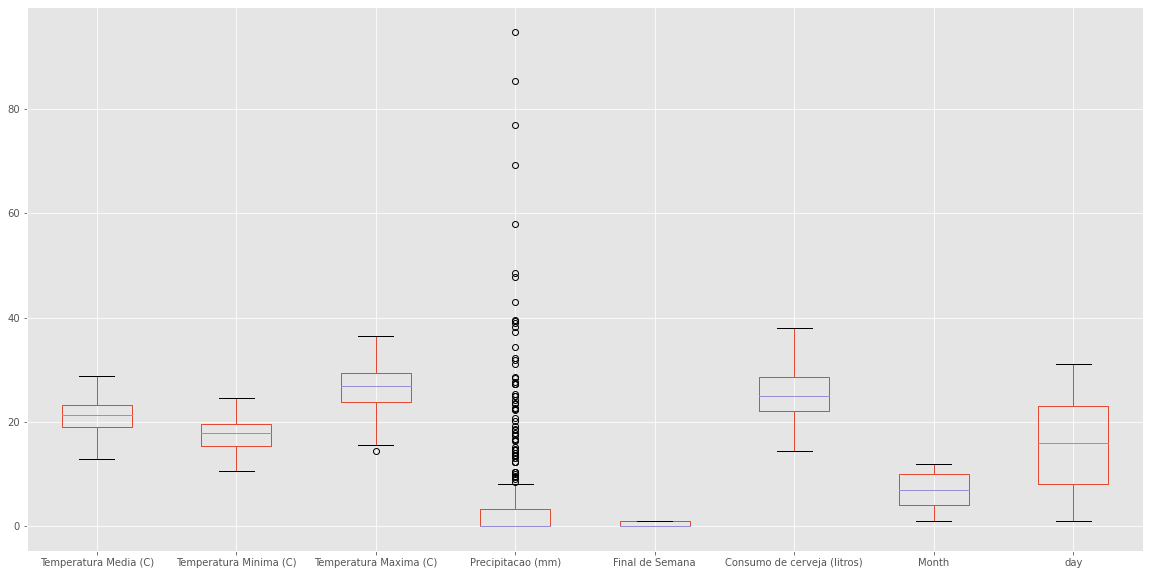

In [9]:
# 6.Analyze features with outlier values

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

plt.style.use("ggplot")
df1.boxplot(figsize=(20,10))
plt.show()

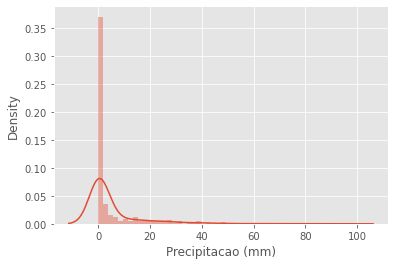

In [10]:
# Precipitacao (mm)  

sns.distplot(df1["Precipitacao (mm)"]);

In [11]:
df1['Precipitacao (mm)'][df1['Precipitacao (mm)']==0].value_counts()

0.0    218
Name: Precipitacao (mm), dtype: int64

In [12]:
import numpy as np
df1['Precipitacao (mm)'] = np.clip(df1['Precipitacao (mm)'], 0, 40)


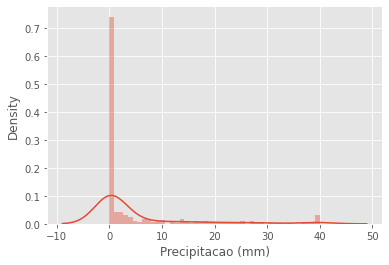

In [13]:
sns.distplot(df1["Precipitacao (mm)"]);

<AxesSubplot:>

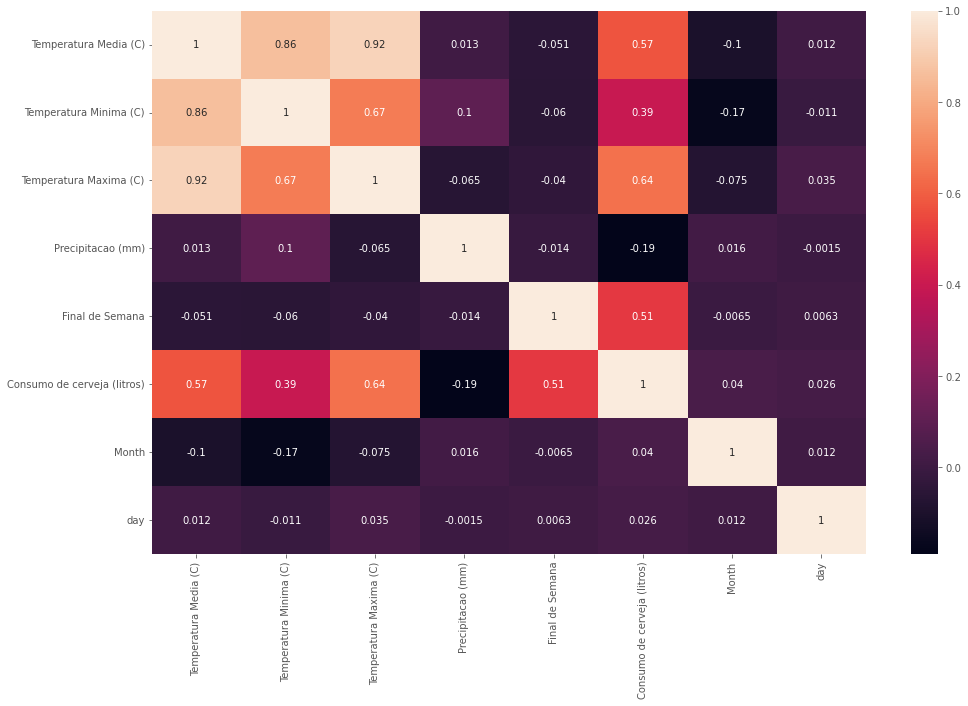

In [14]:
# 7.Plot and analyze the correlation
plt.figure(figsize=(16,10))
sns.heatmap(df1.corr(), annot = True)

In [15]:
# 8.Split the dataset for training and testing

from sklearn.model_selection import train_test_split
X= df1.drop(columns=['Consumo de cerveja (litros)'], axis=1)
y= df1['Consumo de cerveja (litros)']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.20 , random_state = 5)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((292, 7), (73, 7), (292,), (73,))

In [16]:
# 9.Train a linear regression model and print the intercept and coefficients

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
print('Intercepts :',lr.coef_)
print('coefficients :', lr.intercept_)

Intercepts : [-0.08362278  0.07881851  0.70817441 -0.07326904  5.22853545  0.10712941
 -0.00950429]
coefficients : 5.3087346035106755


In [17]:
# 10.Evaluate the model using the R2 score, mean absolute error, and root mean squared error

from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
y_pred = lr.predict(X_test)
print("r2 score :", r2_score(y_test,y_pred))
print("mean absolute error :", mean_absolute_error(y_test,y_pred))
print("root mean squared error :", mean_squared_error(y_test,y_pred))

r2 score : 0.6813129731322678
mean absolute error : 1.836243802514763
root mean squared error : 5.017722246564739


1Problem Statement 2:You are provided with the California housing dataset. Based on the given parameters of a house, predict its price.

Write a Python code to perform the following tasks mentioned:

1.Load the data, check its shape and check for null values 

2.Split the dataset for training and testing -1000 instances for testing

3.Train the model using sklearn (Apply linear regression to train a model for prediction)

4.Predict the prices on test data and evaluate the modelby r2 score and mean absolute error5.Find coefficient and intercept using the trained model

In [18]:
# 1.Load the data, check its shape and check for null values

import pandas as pd
df2 = pd.read_csv('california_housing_train.csv')
print(df2.shape)
print(df2.isnull().sum())


(17000, 9)
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


In [19]:
# 2.Split the dataset for training and testing -1000 instances for testing

X_train= df2.iloc[:-1000,:-1]
y_train= df2.iloc[:-1000,-1]
X_test = df2.iloc[-1000:, :-1]
y_test = df2.iloc[-1000:,-1]

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((16000, 8), (1000, 8), (16000,), (1000,))

In [20]:
# 3.Train the model using sklearn (Apply linear regression to train a model for prediction)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print('Intercepts :',lr.coef_)
print('coefficients :', lr.intercept_)

Intercepts : [-4.20851753e+04 -4.20954131e+04  1.03051140e+03 -8.79478522e+00
  1.21229265e+02 -3.75749690e+01  3.92433254e+01  4.04064982e+04]
coefficients : -3520006.305823008


In [21]:

# 4.Predict the prices on test data and evaluate the modelby r2 score and mean absolute error5.Find coefficient 
# and intercept using the trained model

from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
y_pred = lr.predict(X_test)
print("r2 score :", r2_score(y_test,y_pred))
print("mean absolute error :", mean_absolute_error(y_test,y_pred))
print("root mean squared error :", mean_squared_error(y_test,y_pred))

r2 score : 0.6777386734175951
mean absolute error : 53606.95093838043
root mean squared error : 5297495408.095192


Problem Statement 3:You are provided with the medical cost dataset. You need to predict individual medical costs billed by health insurance.

2Write a Python code to perform the following tasks mentioned:

1.Load the data, check its shape and check for null values 

2.Convert categorical featuresto numerical values (Use One-Hot Encoding)

3.Split the dataset for training and testing  

4.Train the model using sklearn –Linear Regression

5.Find the intercept and coefficient from the trained model 

6.Predict the prices of test data and evaluate the model using calculatedr2 score and root mean squared error

In [22]:
# 1.Load the data, check its shape and check for null values

df3=pd.read_csv('insurance.csv')

print(df3.shape)
df3.isnull().sum()

(1338, 7)


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [23]:
df3.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [24]:
# 2.Convert categorical featuresto numerical values (Use One-Hot Encoding)

from sklearn.preprocessing import OneHotEncoder

obj= df3.select_dtypes("object")

enc = OneHotEncoder()
enc_data=pd.DataFrame(enc.fit_transform(obj).toarray())
enc_data.head()

,0,1,2,3,4,5,6,7
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [25]:
df3.drop(columns=['sex','smoker','region'], inplace=True)
new = pd.concat([enc_data , df3], ignore_index=True, axis=1)
new.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19,27.900,0,16884.92400
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,18,33.770,1,1725.55230
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,28,33.000,3,4449.46200
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,33,22.705,0,21984.47061
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,32,28.880,0,3866.85520


In [26]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1338 non-null   float64
 1   1       1338 non-null   float64
 2   2       1338 non-null   float64
 3   3       1338 non-null   float64
 4   4       1338 non-null   float64
 5   5       1338 non-null   float64
 6   6       1338 non-null   float64
 7   7       1338 non-null   float64
 8   8       1338 non-null   int64  
 9   9       1338 non-null   float64
 10  10      1338 non-null   int64  
 11  11      1338 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 125.6 KB


In [27]:
# 3.Split the dataset for training and testing

from sklearn.model_selection import train_test_split

X= new.iloc[:,:-1]
y= new.iloc[:,-1]

X_train, X_test, y_train, y_test= train_test_split(X , y,test_size=0.2 ,random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

In [28]:
# 4.Train the model using sklearn –Linear Regression

lr = LinearRegression()
lr.fit(X_train, y_train)



LinearRegression()

In [29]:
# 5.Find the intercept and coefficient from the trained model

print('Intercepts :',lr.coef_)
print('coefficients :', lr.intercept_)

Intercepts : [   127.19881786   -127.19881786 -12062.05468851  12062.05468851
    426.60645499    234.60398263   -469.52714954   -191.68328808
    259.54736297    353.03769217    543.28925423]
coefficients : -1209.3247516211195


In [30]:
# 6.Predict the prices of test data and evaluate the model using calculatedr2 score and root mean squared error

from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
y_pred = lr.predict(X_test)
print("r2 score :", r2_score(y_test,y_pred))
print("mean absolute error :", mean_absolute_error(y_test,y_pred))
print("root mean squared error :", mean_squared_error(y_test,y_pred))

r2 score : 0.6953286838318311
mean absolute error : 4555.098582513365
root mean squared error : 42730364.683872394


Problem Statement 4: You are provided with the '50_Startups' data. Using the given features, you must predict the profit of these startups.

Write a Python code to perform the following tasks mentioned:

1.Load the data, check its shape and check for null values

2.Convert categorical features to numerical values using Label Encoder

3.Split the dataset for training and testing 

4.Train the model using sklearn(linear regression), also find the intercept and coefficient from the trained model 

5.Predict the profits of test data and evaluate the model using r2 score and mean squared error

6.Regularize the model using Ridge Regression and find the Score 

7.Regularize the model using LassoRegression and find the Score

In [31]:
# 1.Load the data, check its shape and check for null values

import pandas as pd
df4 = pd.read_csv('50_Startups.csv')
print(df4.shape)
df4.isnull().sum()

(50, 5)


R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [32]:
df4.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [33]:
# 2.Convert categorical features to numerical values using Label Encoder

from sklearn.preprocessing import LabelEncoder
le= LabelEncoder() 
df4['State']= le.fit_transform(df4['State'])
df4.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [34]:
# 3.Split the dataset for training and testing


from sklearn.model_selection import train_test_split

X= new.iloc[:,:-1]
y= new.iloc[:,-1]

X_train, X_test, y_train, y_test= train_test_split(X , y,test_size=0.2 ,random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape



((1070, 11), (268, 11), (1070,), (268,))

In [35]:
# 4.Train the model using sklearn(linear regression), also find the intercept and coefficient from the trained model

lr = LinearRegression()
lr.fit(X_train, y_train)

print('Intercepts :',lr.coef_)
print('coefficients :', lr.intercept_)


Intercepts : [   127.19881786   -127.19881786 -12062.05468851  12062.05468851
    426.60645499    234.60398263   -469.52714954   -191.68328808
    259.54736297    353.03769217    543.28925423]
coefficients : -1209.3247516211195


In [36]:
# 5.Predict the profits of test data and evaluate the model using r2 score and mean squared error

from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
y_pred = lr.predict(X_test)
print("r2 score :", r2_score(y_test,y_pred))
print("mean absolute error :", mean_absolute_error(y_test,y_pred))
print("root mean squared error :", mean_squared_error(y_test,y_pred))

r2 score : 0.6953286838318311
mean absolute error : 4555.098582513365
root mean squared error : 42730364.683872394


In [37]:
# 6.Regularize the model using Ridge Regression and find the Score

from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha= 0.001) 
ridge.fit(X_train,y_train)
pred = ridge.predict(X_test)
ridge.score(X_test,y_test)


0.6953289097727219

In [38]:
# 7.Regularize the model using LassoRegression and find the Score

lasso = Lasso(alpha= 0.01) 
lasso.fit(X_train,y_train)
pred = lasso.predict(X_test)
lasso.score(X_test,y_test)


0.6953288171258678